In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

import pandas as pd

In [2]:
df1 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP1.csv')
df2 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP2.csv')
df3 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP3.csv')
df4 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP4.csv')
df5 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP5.csv')

df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [3]:
# Check shape before cleaning
df.shape[0]

2395

In [4]:
# Remove rows with missing values in key numeric columns
df = df.dropna(subset=[
    "Protein", "Fat", "Carbohydrates", "Caloric Value",
    "Sugars", "Dietary Fiber", "Saturated Fats",
    "Monounsaturated Fats", "Polyunsaturated Fats",
    "Sodium", "Potassium"
])

In [5]:
# Check shape after cleaning - We're expecting the same number of rows since the dataset seems complete
df.shape[0]


2395

In [6]:
# Prepare feature matrix X using relevant nutritional columns
feature_cols = [
    "Protein", "Fat", "Carbohydrates", "Caloric Value",
    "Sugars", "Dietary Fiber", "Saturated Fats",
    "Monounsaturated Fats", "Polyunsaturated Fats",
    "Sodium", "Potassium"
]

#Extended feature columns
extra_feature_cols = [
    "Phosphorus", "Nutrition Density", "Magnesium", "Vitamin B3",
    "Zinc", "Calcium", "Vitamin B6", "Iron", "Vitamin B5",
    "Water", "Cholesterol", "Vitamin B1", "Vitamin E", "Vitamin B2",
    "Vitamin D", "Manganese", "Selenium", "Copper"
]

extended_feature_cols = feature_cols + extra_feature_cols

X = df[extended_feature_cols]


In [7]:
# Explore basic statistics of key nutritional columns
df[["Protein", "Fat", "Carbohydrates", "Caloric Value"]].describe()


,Protein,Fat,Carbohydrates,Caloric Value
count,2395.000000,2395.000000,2395.000000,2395.000000
mean,13.400777,10.176276,18.589021,223.769520
std,32.294246,29.008915,29.406134,384.728244
min,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.300000,0.500000,44.500000
50%,3.500000,2.100000,6.800000,117.000000
75%,13.300000,9.400000,25.050000,258.000000
max,560.300000,550.700000,390.200000,6077.000000


In [8]:
# Test filtering for high-protein, high-carb foods
# df[(df["Protein"] >= 10) & (df["Carbohydrates"] >=30)].filter(items=["food", "Protein", "Carbohydrates", "Caloric Value"])

In [9]:
def assign_label(row):
    # Muscle Gain
    if row["Protein"] >= 20 or (row["Protein"] >= 15 and row["Caloric Value"] >= 250):
        return "Muscle Gain"

    # Endurance
    if row["Carbohydrates"] >= 30 or row["Sugars"] >= 12 or \
       (row["Carbohydrates"] >= 20 and row["Sodium"] >= 140):
        return "Endurance"

    # Weight Loss
    if (row["Caloric Value"] < 150) and (row["Fat"] < 5) and \
       (row["Carbohydrates"] < 20 or row["Dietary Fiber"] >= 3 or row["Protein"] >= 10):
        return "Weight Loss"

    # Default
    return "No Category"

In [10]:
df["Label"] = df.apply(assign_label, axis=1)
df["Label"].value_counts()

Label
Weight Loss    1040
Muscle Gain     500
Endurance       473
No Category     382
Name: count, dtype: int64

In [11]:
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Label
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,No Category
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,No Category
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,Weight Loss
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,Weight Loss
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,Weight Loss


In [12]:
# Create training data excluding "No Category"
train_df = df[df["Label"] != "No Category"].copy()

# Assign feature matrix X and target vector y for training
X = train_df[extended_feature_cols].values
y = train_df["Label"].values

# Use LabelEncoder to convert string labels to integers
le = LabelEncoder()

# Fit and transform the labels - This will assign integer labels automatically
y_encoded = le.fit_transform(y)

# Show list of classes
list(le.classes_)

['Endurance', 'Muscle Gain', 'Weight Loss']

In [13]:
# Use StandardScaler to standardize features
scaler = StandardScaler()

# Compute mean and standard deviation of each feature and scale each row
X_scaled = scaler.fit_transform(X)

In [14]:
# Test 20% of data
# Stratify to maintain class distribution in train and test sets to keep ratio of classes
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [15]:
param_combinations = [
    (50, 1.0),
    (50, 0.3),
    (50, 2.0),
    (100, 1.0),
    (100, 0.5),
    (100, 2.0),
    (200, 1.0),
    (200, 0.5),
    (300, 0.3),
    (300, 1.0),
    (300, 0.1)
]

print("Testing different parameters for AdaBoost:")

# Algorithm: SAMME for multi-class discrete classification
for n, lr in param_combinations:
    clf = AdaBoostClassifier(
        n_estimators=n,
        learning_rate=lr,
        random_state=42,
        algorithm='SAMME',
    )
    scores = cross_val_score(clf, X_scaled, y, cv=5, scoring="f1_macro")
    print(f"n_estimators={n}, lr={lr}, CV F1 Score={scores.mean():.4f}")


Testing different parameters for AdaBoost:
n_estimators=50, lr=1.0, CV F1 Score=0.9787
n_estimators=50, lr=0.3, CV F1 Score=0.9734
n_estimators=50, lr=2.0, CV F1 Score=0.6428
n_estimators=100, lr=1.0, CV F1 Score=0.9787
n_estimators=100, lr=0.5, CV F1 Score=0.9812
n_estimators=100, lr=2.0, CV F1 Score=0.5473
n_estimators=200, lr=1.0, CV F1 Score=0.9787
n_estimators=200, lr=0.5, CV F1 Score=0.9812
n_estimators=300, lr=0.3, CV F1 Score=0.9813
n_estimators=300, lr=1.0, CV F1 Score=0.9787
n_estimators=300, lr=0.1, CV F1 Score=0.9787


In [16]:
# Choose best parameters based on CV results 
clf = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.5,
    random_state=42,
    algorithm='SAMME'
)

clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=200,
                   random_state=42)

Accuracy: 0.9851116625310173
F1 Score (macro): 0.9830112017612018

Classification Report:
               precision    recall  f1-score   support

   Endurance       0.96      0.98      0.97        95
 Muscle Gain       1.00      0.98      0.99       100
 Weight Loss       0.99      0.99      0.99       208

    accuracy                           0.99       403
   macro avg       0.98      0.98      0.98       403
weighted avg       0.99      0.99      0.99       403

Confusion Matrix (rows = true labels, columns = predicted labels):
             Endurance  Muscle Gain  Weight Loss
Endurance           93            0            2
Muscle Gain          2           98            0
Weight Loss          2            0          206


<Figure size 600x400 with 0 Axes>

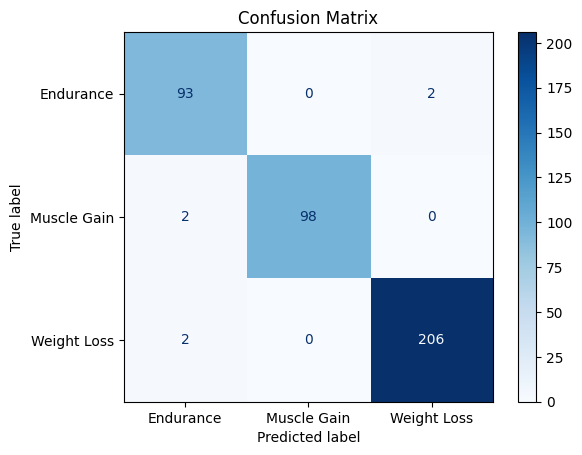

In [17]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix (numeric)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix (rows = true labels, columns = predicted labels):")
print(pd.DataFrame(cm, index=le.classes_, columns=le.classes_))

# Confusion Matrix (plot)
plt.figure(figsize=(6,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [18]:
cv_recall = cross_val_score(clf, X_scaled, y, cv = 5, scoring = 'recall_macro')
cv_precision = cross_val_score(clf, X_scaled, y, cv = 5, scoring = 'precision_macro')
cv_f1 = cross_val_score(clf, X_scaled, y, cv = 5, scoring = 'f1_macro')
cv_accuracy = cross_val_score(clf, X_scaled, y, cv=5, scoring = 'accuracy')

print("\nMETRICS")
print("Accuracy scores:", cv_accuracy)
print("Average Accuracy:", cv_accuracy.mean())
print("\nRecall scores:", cv_recall)
print("Average Recall:", cv_recall.mean())
print("\nPrecision scores:", cv_precision)
print("Average Precision:", cv_precision.mean())
print("\nF1 scores:", cv_f1)
print("Average F1:", cv_f1.mean())


METRICS
Accuracy scores: [0.99751861 0.97022333 0.98263027 0.98507463 0.97761194]
Average Accuracy: 0.9826117551201807

Recall scores: [0.99839744 0.96       0.978222   0.98087971 0.97024141]
Average Recall: 0.9775481092256009

Precision scores: [0.99652778 0.98181818 0.97973254 0.98847536 0.98160594]
Average Precision: 0.9856319600309724

F1 scores: [0.99745159 0.96937761 0.97876226 0.98455404 0.9756124 ]
Average F1: 0.9811515798184614


In [19]:
unlabeled_df = df[df["Label"] == "No Category"].copy()
X_unlabeled = unlabeled_df[extended_feature_cols].values
X_unlabeled_scaled = scaler.transform(X_unlabeled)

unlabeled_df["ML_Prediction"] = le.inverse_transform(clf.predict(X_unlabeled_scaled))


In [20]:
print(unlabeled_df.shape)
unlabeled_df.head(100)


(382, 39)


,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Label,ML_Prediction
0,0,0,cream cheese,51,5.0,2.9,1.3,0.2,0.8,0.5,...,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,No Category,Weight Loss
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.8,3.1,2.7,...,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,No Category,Endurance
6,6,6,gruyere cheese,116,9.1,5.3,2.8,0.5,0.1,0.1,...,0.094,10.100,0.002,169.400,22.7,0.079,1.100,300.694,No Category,Weight Loss
7,7,7,cheddar cheese,113,9.3,5.3,2.6,0.3,0.9,0.1,...,0.077,7.600,0.063,127.400,21.3,0.009,1.000,215.530,No Category,Weight Loss
12,12,12,swiss cheese,98,7.7,4.6,2.0,0.3,0.4,0.0,...,0.024,8.300,0.062,143.500,18.0,0.031,1.100,237.396,No Category,Weight Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,268,chicken crispy wings kentucky fried chicken,148,10.1,2.1,3.3,3.8,5.1,0.0,...,0.300,9.700,0.015,84.500,98.1,0.003,0.500,40.161,No Category,Endurance
269,269,269,egg white delight mcdonalds,250,16.0,4.0,18.0,4.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.0,0.000,0.000,16.000,No Category,Endurance
273,273,273,crispy chicken wing kentucky fried chicken,104,5.3,1.1,1.7,1.8,1.3,0.0,...,0.400,11.000,0.085,99.400,116.6,0.033,0.800,32.851,No Category,Weight Loss
274,274,274,chicken strips burger king,105,5.5,1.0,1.5,2.7,7.4,0.0,...,0.005,0.200,9.700,0.036,104.8,113.400,0.070,20.168,No Category,Weight Loss


In [21]:
unlabeled_df.to_csv("adaboost_unlabeled_with_predictions.csv", index=False)


In [22]:
muscle_gain_df = df[df["Label"] == "Muscle Gain"].copy()
X_muscle_gain = muscle_gain_df[extended_feature_cols].values
X_muscle_gain_scaled = scaler.transform(X_muscle_gain)

muscle_gain_df["ML_Prediction"] = le.inverse_transform(clf.predict(X_muscle_gain_scaled))

In [23]:
muscle_gain_df.to_csv("adaboost_muscle_gain_with_predictions.csv", index=False)
